In [38]:
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.1 MB/s eta 0:00:0031m14.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.6 MB/s eta 0:00:00


In [39]:
import pandas as pd
import numpy as np  
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./bike_sales_100k.csv', sep=';')

def pysqldf(q):
    return ps.sqldf(q, globals())

pd.set_option('display.float_format', '{:.2f}'.format)

Matplotlib is building the font cache; this may take a moment.


In [3]:
# identificar cuántos datos nulos hay en cada columna
df.isnull().sum()

Sale_ID              0
Date                 0
Customer_ID          0
Bike_Model           1
Price               19
Quantity             0
Store_Location       0
Salesperson_ID       0
Payment_Method     201
Customer_Age         0
Customer_Gender      0
dtype: int64

In [4]:
# eliminar las filas con datos nulos
df_clean = df.dropna()

In [ ]:
# eliminar las filas que tengan datos nulos en alguna de las columnas seleccionadas
df_filtered = df.dropna(subset=['columna1', 'columna2'])

In [ ]:
# eliminar las filas con datos nulos en todas las columnas seleccionadas
df_filtered = df.dropna(how='all', subset=['columna1', 'columna2'])

In [ ]:
# llenar datos nulos con un valor específico
df_filled = df.fillna(0)

# llenar datos nulos con el valor de la media de la columna
df_filled = df.fillna(df['columna'].mean())

# llenar datos nulos con el valor de la mediana de la columna
df_filled = df.fillna(df['columna'].median())

# llenar datos nulos con el valor de la moda de la columna
df_filled = df.fillna(df['columna'].mode())

# llenar datos nulos con el valor anterior
df_filled = df.fillna(method='ffill')

# llenar datos nulos con el valor siguiente
df_filled = df.fillna(method='bfill')

# Rellenar valores nulos con números aleatorios entre 10 y 100
df['valor'] = df['valor'].fillna(np.random.randint(10, 100, size=len(df)))




In [22]:
averages = pysqldf("""
        select 
        "Bike_Model",
        avg("Price") as "Average_Price"
        from df
        group by "Bike_Model"
        """)

df_filled = pysqldf("""
        select
        df.*,
        case 
            when df."Price" is null then averages."Average_Price"
            else df."Price"
        end as "PriceFilled"
        from df
        left join averages on df."Bike_Model" = averages."Bike_Model"
        """)


pysqldf("""
        select
        * from df_filled
        where "Price" is null
        """)

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender,PriceFilled
0,8,22/08/21,5784,Road Bike,None,1,Philadelphia,291,Debit Card,57,Male,2600.795666
1,32,16/06/23,7037,Cruiser,None,5,Philadelphia,897,Apple Pay,59,Male,2596.005744
2,56,26/07/20,9651,Folding Bike,None,2,Chicago,621,Apple Pay,33,Male,2590.194098
3,81,12/06/20,9972,BMX,None,5,Philadelphia,404,Debit Card,46,Female,2608.673173
4,113,10/04/20,3843,Folding Bike,None,3,Houston,733,Credit Card,56,Female,2590.194098
5,183,12/11/22,2350,Folding Bike,None,1,Chicago,284,Apple Pay,34,Female,2590.194098
6,225,2/03/20,9407,BMX,None,5,Phoenix,635,Debit Card,46,Female,2608.673173
7,308,1/07/24,4513,Electric Bike,None,1,Philadelphia,291,Credit Card,61,Male,2597.861313
8,374,8/08/23,6855,Electric Bike,None,1,New York,971,Google Pay,64,Female,2597.861313
9,422,19/03/20,7755,BMX,None,2,Philadelphia,792,Cash,60,Female,2608.673173


In [26]:
# Extracción de datos

cliente = pd.read_csv('./cliente.csv', sep=';')

usuario = pd.read_csv('./usuario.csv', sep=';')

contrato = pd.read_csv('./contrato.csv', sep=';')

reporte = pd.read_csv('./reporte.csv', sep=';')

In [36]:
# Transformación de datos

# ¿Cuál es el top 3 de clientes que han generado más ingresos? ¿Cuánto ingreso generó cada uno de ellos?
ventas_por_cliente = pysqldf("""
select 
c.nombre,
sum(c2.venta) as total        
from cliente c
    join contrato c2
        on c2."clienteId" = c."id"
group by c.nombre
order by total desc
""")

# ¿Cuál es el top 3 de usuarios con más horas reportadas en julio de 2024? ¿Cuántas horas reportó cada uno de ellos?

# ¿Cuáles son los 3 contratos con más horas reportadas durante 2024? ¿Cuántas horas se han reportado en cada uno de ellos?

# ¿Cuál fue el mes con más horas trabajadas en 2023? ¿Cuántas horas se trabajaron en ese mes?

# ¿Cuáles son los dos usuarios con los reportes individuales más grandes y cuántas horas reportó cada uno?

# ¿Cuál es el top 3 de clientes con el mayor gasto de horas por contrato? ¿Cuál es el total de horas para cada uno de ellos?

# ¿Cuál es el top 3 de usuarios con más reportes generados en el primer trimestre de 2024? ¿Cuántos reportes generó cada uno de ellos?

# ¿Cuáles son los 5 clientes con el promedio más alto en ventas? ¿Cuál es el valor promedio de venta para cada uno de estos clientes? 

# ¿Cuál fue el mes con menos horas trabajadas en el primer semestre de 2024? ¿Cuántas horas se trabajaron en ese mes?

# ¿Cuáles son los dos clientes con los contratos de menor costo (sin incluir contratos de costo 0), y cuál es el costo de estos contratos? 

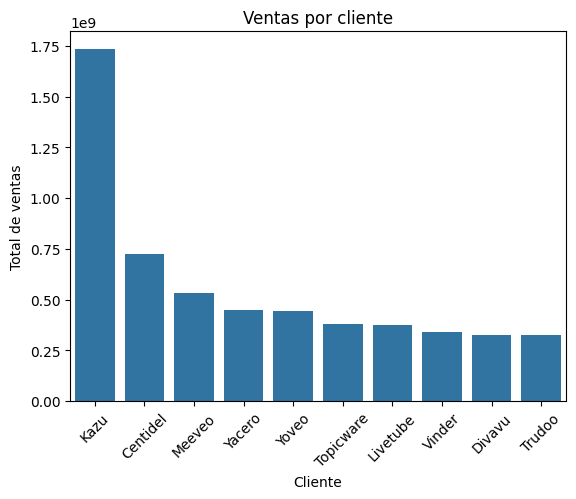

<Figure size 1500x2000 with 0 Axes>

In [55]:
# carga

ventas_por_cliente.to_csv('./ventas_por_cliente.csv', sep=';')

# informe

sns.barplot(x='nombre', y='total', data=pysqldf("""select * from ventas_por_cliente limit 10"""))
plt.title('Ventas por cliente')
plt.xlabel('Cliente')
plt.ylabel('Total de ventas')
plt.xticks(rotation=45)
plt.figure(figsize=(15, 20))
plt.tight_layout()
plt.show()

